In [32]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik

pd.options.display.max_columns = None #полностью отображаем столбцы
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arnabchaki/data-science-salaries-2023")

print("Path to dataset files:", path)

In [33]:
df = pd.read_csv('C:/Users/Public/Documents/ds_salaries.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [34]:
# первые строки датасета
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [35]:
# Общая информация по признакам

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [37]:
# Уникальные значения категориальных признаков

df.select_dtypes(include='object').nunique()

experience_level       4
employment_type        4
job_title             93
salary_currency       20
employee_residence    78
company_location      72
company_size           3
dtype: int64

In [38]:
#заменим верхний регистр на нижний
df.columns = df.columns.str.lower()
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [39]:
#  Проверка пропущенных значений

df.isna().sum()


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [40]:
# заполнение пустых городов

df['employee_residence'].fillna('Unknown', inplace=True)

In [41]:
# Проверка и удаление дубликатов

df.duplicated().sum()  # Количество дубликатов

# Удаление дубликатов
df = df.drop_duplicates()

In [42]:
# Ещё раз проверим

df.isna().sum()
df.duplicated().sum()

0

In [ ]:
# Распределение ключевых категорий

# уровень опыта работы в течение года

df['experience_level'].value_counts()

experience_level
SE    1554
MI     664
EN     270
EX      96
Name: count, dtype: int64

In [ ]:
# тип занятости для данной должности

df['employment_type'].value_counts()

employment_type
FT    2547
PT      17
CT      10
FL      10
Name: count, dtype: int64

In [ ]:
# среднее количество сотрудников, работавших в компании в течение года

df['company_size'].value_counts()

company_size
M    2028
L     409
S     147
Name: count, dtype: int64

In [ ]:
# общий объем работы, выполненной удаленно

df['remote_ratio'].value_counts()

remote_ratio
100    1211
0      1186
50      187
Name: count, dtype: int64

In [ ]:
#основная страна проживания сотрудника в течение рабочего года в формате кода страны ISO 3166.

df['employee_residence'].value_counts().head(10)

employee_residence
US    1893
GB     150
CA      81
IN      70
ES      47
DE      47
FR      37
PT      18
BR      18
NL      15
Name: count, dtype: int64

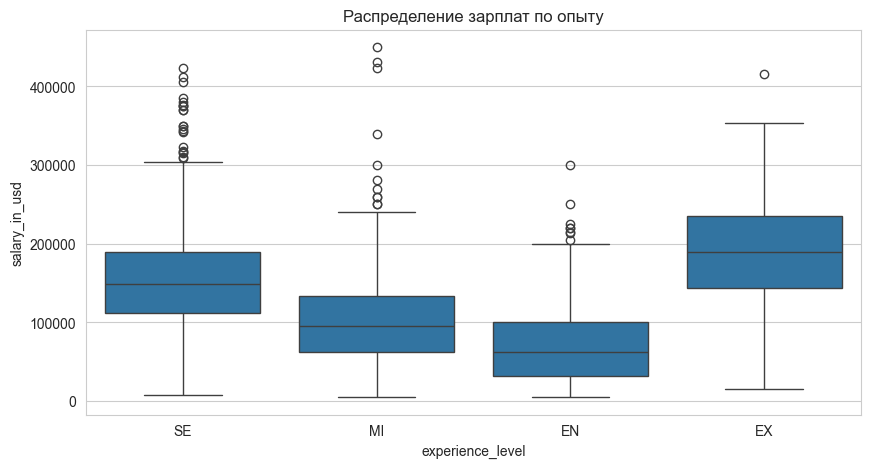

In [ ]:
# Визуальный анализ распределения зарплат

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd')
plt.title("Распределение зарплат по опыту")
plt.show()

# EN — Junior (Entry-Level)
# MI — Middle (Mid-Level)
# SE — Senior
# EX — Executive (C-level) - Опыт влияет на уровень зарплаты

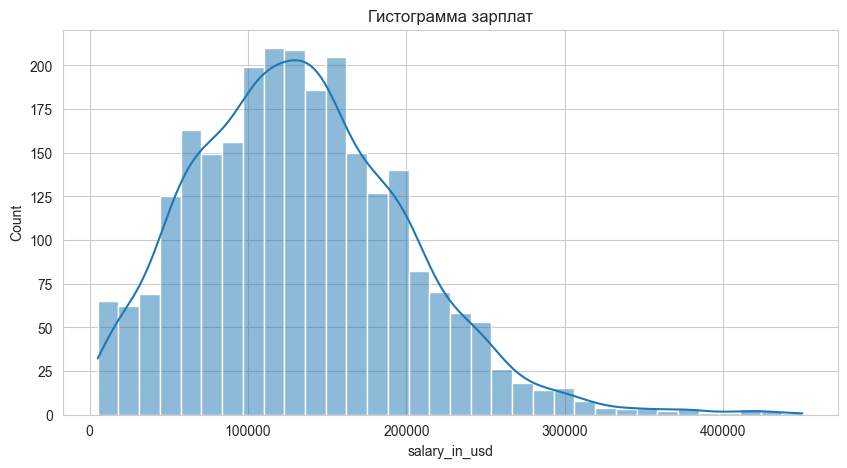

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['salary_in_usd'], kde=True)
plt.title("Гистограмма зарплат")
plt.show()

# чем выше зарплата - тем меньше вакансий

In [51]:
# Корреляция числовых признаков

df.corr(numeric_only=True)

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.099153,0.236958,-0.219160
salary,-0.099153,1.000000,-0.043672,0.026485
salary_in_usd,0.236958,-0.043672,1.000000,-0.084502
remote_ratio,-0.219160,0.026485,-0.084502,1.000000


<Axes: >

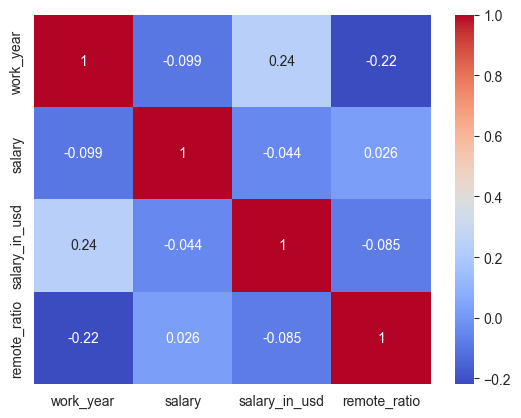

In [ ]:
# тепловая карта:

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

# почти нет связ года выплаты с зарплатой, а также почти нет связи зарплаты с объмом выполненой работы

In [ ]:
#  1. Самые высокооплачиваемые должности

df.groupby('job_title')['salary_in_usd'].median().sort_values(ascending=False).head(10)

In [ ]:
# 2. Есть ли выбросы в зарплатах? В каких должностях?

plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='job_title', y='salary_in_usd')
plt.xticks(rotation=90)
plt.title("Выбросы зарплаты по должностям")
plt.show()

In [ ]:
# Влияет ли удалёнка на зарплату?

df.groupby('remote_ratio')['salary_in_usd'].median()

# (0 = нет удалёнки, 50 = гибрид, 100 = полностью удалённо)

In [ ]:
# 4. Зависит ли зарплата от размера компании?

df.groupby('company_size')['salary_in_usd'].median().sort_values(ascending=False)

In [ ]:
# 5. Популярные страны и уровень зарплат

# Популярные

df['employee_residence'].value_counts().head(10)



In [ ]:
# Средняя зарплата по странам

df.groupby('employee_residence')['salary_in_usd'].median().sort_values(ascending=False).head(10)

In [ ]:
#6. Медианная зарплата по должностям

df.groupby('job_title')['salary_in_usd'].median().sort_values(ascending=False)

In [ ]:
# 7. Как изменились зарплаты в 2023 по сравнению с 2020

# Медианная зарплата по должностям в 2020 и 2023
# Оставим только 2020 и 2023
salary_filtered = df[df['work_year'].isin([2020, 2023])]

# Группируем по году и должности → медианная зарплата
salary_by_year = salary_filtered.groupby(['job_title', 'work_year'])['salary_in_usd'].median().unstack()

# Убедимся, что обе колонки (2020 и 2023) есть
salary_by_year = salary_by_year.dropna(subset=[2020, 2023])

# Добавим процент изменения
salary_by_year['change_%'] = ((salary_by_year[2023] - salary_by_year[2020]) / salary_by_year[2020]) * 100

# Сортировка по убыванию прироста
salary_by_year.sort_values('change_%', ascending=False)



In [ ]:
 #8. Портрет самого успешного работника

df[df['salary_in_usd'] == df['salary_in_usd'].max()]

In [ ]:
#9. Живут и работают в разных странах

# Люди, у кого место работы и проживания не совпадает
df_diff_country = df[df['employee_residence'] != df['company_location']]


In [ ]:
# Количество таких людей
df_diff_country.shape[0]


In [ ]:
# Сколько процентов работают на другую страну
percent_remote_country = df_diff_country.shape[0] / df.shape[0] * 100
percent_remote_country